<h2><span>Demand Forecasting</span></h2>
<p>Can you forecast the demand of the car rentals on an hourly basis?</p>
<h2><br><span >Problem Statement</span></h2>
<p style="text-align: justify;">ABC is a car rental company based out of Bangalore. It rents cars for both in and out stations at affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and MUVs, Minivans and so on.</p>
<p style="text-align: justify;">In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the problem of supply and demand. The ultimate goal of the company is to strike the balance between the supply and demand inorder to meet the user expectations.&nbsp;</p>
<p style="text-align: justify;">The company has collected the details of each rental. Based on the past data, the company would like to forecast the demand of car rentals on an hourly basis.&nbsp;</p>
<h2><br><span >Objective</span></h2>
<p>The main objective of the problem is to develop the machine learning approach to forecast the demand of car rentals on an hourly basis.</p>
<h2><br><span >Data Dictionary</span></h2>
<p>You are provided with 3 files - train.csv, test.csv and sample_submission.csv</p>
<p><span >Training set</span></p>
<p><strong>train.csv</strong> contains the hourly demand of car rentals from August 2018 to February 2021.<br><br></p>
<table border="1" style="margin-right: calc(51%); width: 49%;">
<tbody>
<tr>
<td style="width: 42.3159%;">
<p><strong>Variable</strong></p>
</td>
<td style="width: 57.3774%;">
<p><strong>Description</strong></p>
</td>
</tr>
<tr>
<td style="width: 42.3159%;">
<p>date</p>
</td>
<td style="width: 57.3774%;">
<p>Date (yyyy-mm-dd)</p>
</td>
</tr>
<tr>
<td style="width: 42.3159%;">
<p>hour</p>
</td>
<td style="width: 57.3774%;">
<p>Hour of the day</p>
</td>
</tr>
<tr>
<td style="width: 42.3159%;">
<p>demand</p>
</td>
<td style="width: 57.3774%;">
<p>No. of car rentals in a hour</p>
</td>
</tr>
</tbody>
</table>
<h3><br><span >Test set</span></h3>
<p><strong>test.csv</strong> contains only 2 variables: date and hour. You need to predict the hourly demand of car rentals for the next 1 year i.e. from March 2021 to March 2022.<br><br></p>
<table border="1" style="margin-right: calc(52%); width: 48%;">
<tbody>
<tr>
<td style="width: 45.5735%;">
<p><strong>Variable</strong></p>
</td>
<td style="width: 53.3956%;">
<p><strong>Description</strong></p>
</td>
</tr>
<tr>
<td style="width: 45.5735%;">
<p>date</p>
</td>
<td style="width: 53.3956%;">
<p>Date (yyyy-mm-dd)</p>
</td>
</tr>
<tr>
<td style="width: 45.5735%;">
<p>hour</p>
</td>
<td style="width: 53.3956%;">
<p>Hour of the day</p>
</td>
</tr>
</tbody>
</table>
<h2><br><span >Submission File Format</span></h2>
<p><strong>sample_submission.csv&nbsp;</strong>contains 3 variables - date, hour and demand<br><br></p>
<table border="1" style="margin-right: calc(52%); width: 48%;">
<tbody>
<tr>
<td style="width: 45.4859%;">
<p><strong>Variable</strong></p>
</td>
<td style="width: 54.2006%;">
<p><strong>Description</strong></p>
</td>
</tr>
<tr>
<td style="width: 45.4859%;">
<p>date</p>
</td>
<td style="width: 54.2006%;">
<p>Date (yyyy-mm-dd)</p>
</td>
</tr>
<tr>
<td style="width: 45.4859%;">
<p>hour</p>
</td>
<td style="width: 54.2006%;">
<p>Hour of the day</p>
</td>
</tr>
<tr>
<td style="width: 45.4859%;">
<p>demand</p>
</td>
<td style="width: 54.2006%;">
<p>No. of car rentals in a hour</p>
</td>
</tr>
</tbody>
</table>
<h2><br><span>Evaluation metric</span></h2>
<p>The evaluation metric for this hackathon is RMSE score.</p>




<b><h1>Solution: </h1><b>

In [1]:
#import libraries

import pandas as pd 
import numpy as np 
import holidays
import matplotlib.pyplot as plt
import seaborn as sns


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
""" 
check_holiday(date)

returns 1 if date is a holiday else 0 
"""
def check_hoilday(date):
    if date in holidays.IN() or date in holidays.US():
        return 1
    else:
        return 0


""" 
check_season(month)
0: summer
1: fall
2: winter

"""
def check_season(month):
    if month in [3,4,5,6]:
        return 0 #'summer'
    elif month in [7,8,9,10]:
        return 1#'fall'
    elif month in [11,12,1,2]:
        return 2 #'winter'


<b> <h3>Feature Engineering</h3> </b>

<b> date </b> -> is converted into `year`, `month`, `day`, `dayofweek`, and `season`# checking statistics of the data
train_df.describe() columns. And Also `is_weekend` column is created for checking whether it is weekend or not

In [3]:
""" 
Feature Engineering of the data

preprocessing(df)

"""
def preprocessing(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    df['season'] = df['month'].apply(check_season)
    df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x in ['Sunday', 'Saturday',5, 6] else 0)
    df['after_weekend'] = df['dayofweek'].apply(lambda x: 1 if x == 'Monday' or x == 0 else 0)
    df['before_weekend'] = df['dayofweek'].apply(lambda x: 1 if x == 'Saturday' or x == 5 else 0)
    df['is_holiday'] = df['date'].apply(check_hoilday)

    df.set_index('date', inplace=True)
    df.sort_index(inplace=True)
    return df


In [4]:
train_df = preprocessing(pd.read_csv('train_E1GspfA.csv')) # preprocessing the train data
test_df = preprocessing(pd.read_csv('test_6QvDdzb.csv')) # preprocessing the test data

In [5]:
train_df.info() # check the dataframe and its columns, And also null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18247 entries, 2018-08-18 to 2021-02-28
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   hour            18247 non-null  int64
 1   demand          18247 non-null  int64
 2   year            18247 non-null  int64
 3   month           18247 non-null  int64
 4   day             18247 non-null  int64
 5   dayofweek       18247 non-null  int64
 6   season          18247 non-null  int64
 7   is_weekend      18247 non-null  int64
 8   after_weekend   18247 non-null  int64
 9   before_weekend  18247 non-null  int64
 10  is_holiday      18247 non-null  int64
dtypes: int64(11)
memory usage: 1.7 MB


In [6]:
# checking statistics of the data
train_df.describe()

,hour,demand,year,month,day,dayofweek,season,is_weekend,after_weekend,before_weekend,is_holiday
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,12.614731,73.991451,2019.396997,6.470324,15.782430,3.025867,1.099414,0.290788,0.141886,0.145613,0.052885
std,6.544963,41.678988,0.810979,3.618189,8.772904,2.003638,0.812515,0.454138,0.348943,0.352727,0.223811
min,0.000000,1.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,43.000000,2019.000000,3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,71.000000,2019.000000,7.000000,16.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,98.000000,2020.000000,10.000000,23.000000,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,23.000000,379.000000,2021.000000,12.000000,31.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000


<b><h3>EDA</h3><b>
    
From Dataset, we observerd that there are two independent variables(i.e., `date`, `hour`)  but both are measuring time. and another variable is `demand` which is our target/ dependent variable. 
    
Taking this into note, we devired new features from existing `date` feature like `year`, `month`, `relative date`, `day`, `season`, `is_weekend`, `after_weekend`, `before_weekend`, `is_hoilday`
    
`year`   -> 2019,2020.. <br>
`month`  -> Jan, Feb, March..... etc in numerial form <br>
`day`    -> Monday, Tuesday..etc in numerial form, 0-6 <br>
`season` -> summer, Rainy , winter <br>
    

    

<b>Average of the car rentals demand for each hour of the day </b>

'" \nBelow graph shows the average demand for each hour of the day,  we conclude that the demand of cars \nrentals are high in between the hours of 11 to 20. and rest of the hours are low.\n'

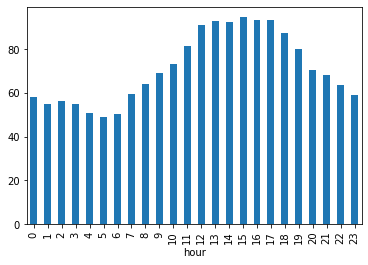

In [7]:
""" 
Average of the car rentals demand for each hour of the day 

"""
train_df.groupby('hour').mean()['demand'].plot(kind='bar')

"""" 
Below graph shows the average demand for each hour of the day,  we conclude that the demand of cars 
rentals are high in between the hours of 11 to 20. and rest of the hours are low.
"""

<b> Average of the car rentals demand for each day of the month </b>

'" \nBelow graph shows the average demand for each day of the month,  we conclude that the demand of cars \nrentals are almost average upto 75.\n'

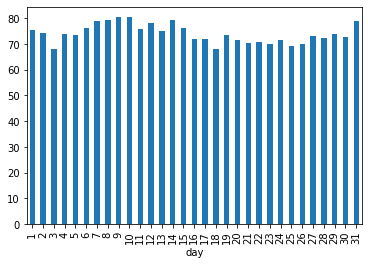

In [8]:
""" 
Average of the car rentals demand for each day of the month 

"""
train_df.groupby('day').mean()['demand'].plot(kind='bar')

"""" 
Below graph shows the average demand for each day of the month,  we conclude that the demand of cars 
rentals are almost average upto 75.
"""

<b>Average of the car rentals demand for each day of the week</b>

' \nBelow graph shows the average demand for each day of the week,  we conclude that the average demand \nfor the end of week is higher than the remaning days of week.\n'

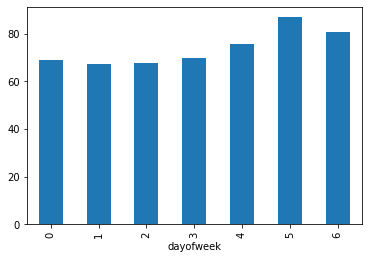

In [9]:
""" 
Average of the car rentals demand for each day of the week 

"""
train_df.groupby('dayofweek').mean()['demand'].plot(kind='bar')

""" 
Below graph shows the average demand for each day of the week,  we conclude that the average demand 
for the end of week is higher than the remaning days of week.
"""

<b>Average of the car rentals demand for each day of the week</b>

'" \nBelow graph shows the average demand for each hour of the day,  we conclude that the demand of cars \nrentals are almost average upto 79. In November, the demand is higher than the rest of the months.\n'

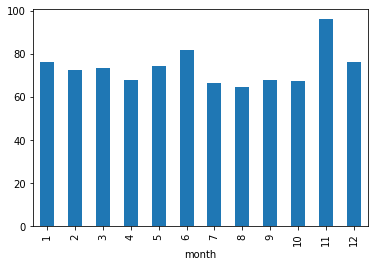

In [10]:
""" 
Average of the car rentals demand for each month of the year 

"""
train_df.groupby('month').mean()['demand'].plot(kind='bar')

"""" 
Below graph shows the average demand for each hour of the day,  we conclude that the demand of cars 
rentals are almost average upto 79. In November, the demand is higher than the rest of the months.
"""

<b>Average of the car rentals demand for each year</b>

'" \nBelow graph shows the average demand in years,  we conclude that the demand of cars \nrentals are slightly increasing demand over the years.\n'

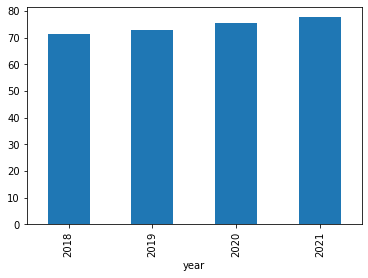

In [11]:
""" 
Average of the car rentals demand for each year
"""
train_df.groupby('year').mean()['demand'].plot(kind='bar')

"""" 
Below graph shows the average demand in years,  we conclude that the demand of cars 
rentals are slightly increasing demand over the years.
"""

<b> Correlation of Features on one to one bias: </b>

<AxesSubplot:>

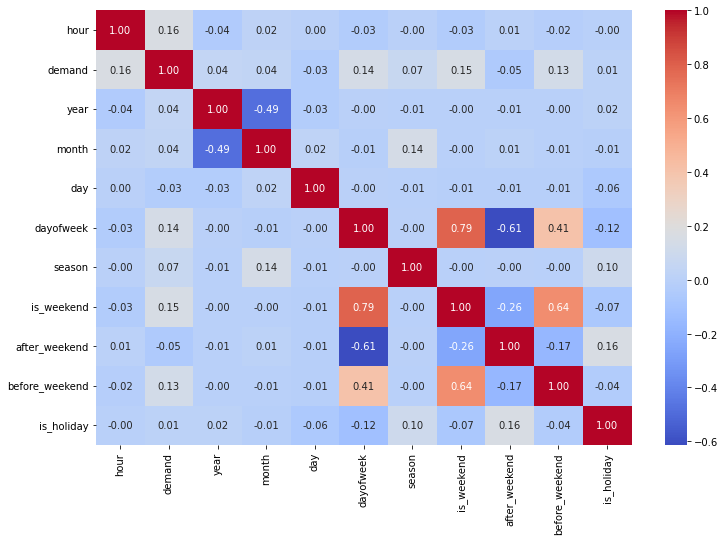

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

sns.heatmap(
train_df.corr(), fmt='.2f', annot=True, cmap='coolwarm')

<AxesSubplot:ylabel='Frequency'>

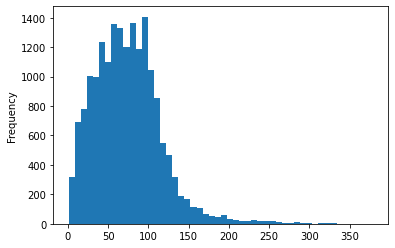

In [13]:
train_df['demand'].plot(kind='hist', bins=50) #Positive skewed distribution

In [14]:
train_df.fillna(0, inplace=True) # null values replace with 0 bcoz, in hoilday column we shifts rows up or down in train data
test_df.fillna(0, inplace=True) # null values replace with 0 bcoz, in hoilday column we shifts rows up or down in test data

<b>OneHot Encoding <b>

In [15]:
#only onehot encoding -> dayofweek 

train_df = pd.concat([train_df, pd.get_dummies(train_df['dayofweek'], prefix='dayofweek')], axis=1) 
train_df.drop(['dayofweek'], axis=1, inplace=True)


test_df = pd.concat([test_df, pd.get_dummies(test_df['dayofweek'], prefix='dayofweek')], axis=1)
test_df.drop(['dayofweek'], axis=1, inplace=True)


<b> Spliting of dataset into Train and Test data </b>

In [16]:
split = int(round(train_df.shape[0]*0.75, 0)) # 75 % trainset and 25 % testset split value in train_df 

Xtrain = train_df[:split].drop(['demand'], axis=1)
ytrain = train_df[:split]['demand']

Xtest = train_df[split:].drop(['demand'], axis=1)
ytest = train_df[split:]['demand']

<b><h3> Model Training: </h3> <b>
    
    By Statistcal Analysis of Dataset, we found that it is a time-series problem but if we use time-series models, the predications are not good. Because `demand` variable is almost uniform distrubution. Finally, we concluded that the problem statement is a regression model in supervised learning to acheive better predications.
    
 <b>Linear Regression<b>


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

ypred = lr.predict(Xtest)
print("RMSE Score:- {0}".format(mean_squared_error(ytest, ypred, squared=False)))

RMSE Score:- 41.94499989178477


<b>RandomForest Regressor<b>

In [18]:
from sklearn.ensemble import RandomForestRegressor

rnfr = RandomForestRegressor()
rnfr.fit(Xtrain, ytrain)

rnf_ypred = rnfr.predict(Xtest)
print("RMSE Score:- {0}".format(mean_squared_error(ytest, rnf_ypred, squared=False)))

RMSE Score:- 38.249143921960176


<b> XGBoost:- </b>

In [19]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(learning_rate=0.05, objective='reg:squarederror', n_estimators=50, max_depth=3)
xgbr.fit(Xtrain, ytrain)

xgbrp = xgbr.predict(Xtest)
print("RMSE Score:- {0}".format(mean_squared_error(ytest, xgbrp, squared=False)))

RMSE Score:- 39.042231074399844


<b> LightGBM </b>

In [20]:
import lightgbm as lgb

lgbr = lgb.LGBMRegressor(learning_rate=0.05, n_estimators=1000, max_depth=3)
lgbr.fit(Xtrain, ytrain)

lgbp = lgbr.predict(Xtest)

print("RMSE Score:- {0}".format(mean_squared_error(ytest, lgbp, squared=False)))

RMSE Score:- 36.20811622540985


<b><h3> Hyper-Parameter Tuning:- </h3> </b>
<b>XGBRegressor <b>

In [21]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(
            estimator=XGBRegressor(),
            param_grid={"estimator__learning_rate": (0.01, 0.05), "estimator__n_estimators": (100,150), 
            "estimator__objective": ('reg:squarederror', 'reg:gamma', 'reg:linear'), "estimator__max_depth": (5, 10)},
            cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_result = gsc.fit(Xtrain, ytrain)
print(grid_result.best_params_, "\n\n\n")
print("RMSE Score:- {0}".format(mean_squared_error(ytest, gsc.predict(Xtest), squared=False)))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[21:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators", "estimator__objective" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'estimator__learning_rate': 0.01, 'estimator__max_depth': 5, 'estimator__n_estimators': 100, 'estimator__objective': 'reg:squarederror'} 



RMSE Score:- 38.63728727448773


<b>LightGBM Regressor </b>

In [22]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

lgsv = GridSearchCV(
            estimator=LGBMRegressor(),
            param_grid={"estimator__boosting_type":('rf', 'dart'),"estimator__learning_rate": (0.05, 0.01),\
                 "estimator__n_estimators": (50, 100), "estimator__max_bin": (32, 64),
                 "estimator__max_depth": (3, 5), "estimator__num_leaves": (32,64)},
            cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

lreg = lgsv.fit(Xtrain, ytrain)
print(lreg.best_params_, "\n\n\n")

print("RMSE Score:- {0}".format(mean_squared_error(ytest, lgsv.predict(Xtest), squared=False)))

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[LightGBM] [Warning] Unknown parameter: estimator__max_depth
[LightGBM] [Warning] Unknown parameter: estimator__n_estimators
[LightGBM] [Warning] Unknown parameter: estimator__boosting_type
[LightGBM] [Warning] Unknown parameter: estimator__learning_rate
[LightGBM] [Warning] Unknown parameter: estimator__max_bin
[LightGBM] [Warning] Unknown parameter: estimator__num_leaves
{'estimator__boosting_type': 'rf', 'estimator__learning_rate': 0.05, 'estimator__max_bin': 32, 'estimator__max_depth': 3, 'estimator__n_estimators': 50, 'estimator__num_leaves': 32} 



RMSE Score:- 35.71700775031582


<b>Feature Importances </b>

In [23]:
lgbr.feature_name_

['hour',
 'year',
 'month',
 'day',
 'season',
 'is_weekend',
 'after_weekend',
 'before_weekend',
 'is_holiday',
 'dayofweek_0',
 'dayofweek_1',
 'dayofweek_2',
 'dayofweek_3',
 'dayofweek_4',
 'dayofweek_5',
 'dayofweek_6']

<BarContainer object of 16 artists>

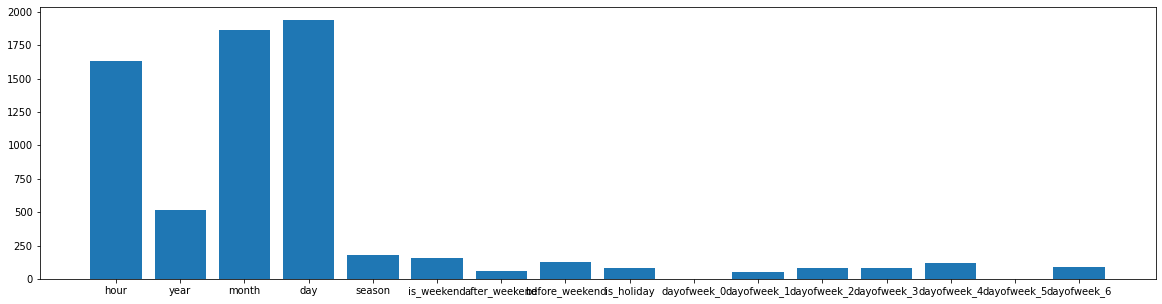

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

plt.bar([lgbr.feature_name_[x] for x in range(len(lgbr.feature_importances_))], lgbr.feature_importances_)

<b><h3>Model Testing</h3></b>

<b>Predications</b>

Finally, I concluded that `LGBMRegressor()` is best estimator for forcasting the car rentals on hourly basis.

In [25]:
testpred = lgsv.predict(test_df)

In [26]:
test_df.shape

(7650, 16)

<b> Submissions </b>

In [27]:
submissions = pd.DataFrame({
    'date': test_df.index,
    'hour': test_df.hour,
    'demand': np.round(testpred, 0)
})
submissions['demand'] = submissions['demand'].astype('int')
submissions.to_csv('submission.csv', index=False)